# NPCI MLOps Playground Challenge - 4 

[Total: 20 Marks]

## Problem Statement 

Develop a machine learning model that predicts the likelihood of a borrower defaulting on a loan based on factors such as credit history, repayment capacity, and annual income. This model aims to assist financial institutions in assessing the potential financial impact of credit risk and making informed lending decisions.

## Credit Risk Prediction

Credit Risk refers to the likelihood of a borrower failing to repay a loan, leading to potential financial losses for the lender. When financial institutions extend services like mortgages, credit cards, or personal loans, there exists an inherent risk that the borrower may default on their repayment obligations. To evaluate this risk, factors like credit history, repayment capacity, loan terms, and annual income can be considered.

Many companies, especially financial institutions, evaluate the credit risk of their existing and forthcoming customers. With the advent of technologies like machine learning, organizations can analyze customer data to establish a risk profile. Credit risk modeling evaluates a borrower's credit risk based primarily on two factors. The first factor is determining the probability of a borrower defaulting on a loan, while the second factor involves evaluating the financial impact on the lender in case of such a default.



## Dataset Description

The dataset you'll be working with is the Credit Risk dataset, which includes the following features:

* **person_age** - Age
* **person_income** - Annual Income
* **person_home_ownership** - Home ownership
* **person_emp_length** - Employment length (in years)
* **loan_intent** - Loan intent
* **loan_grade** - Loan grade
* **loan_amnt** - Loan amount
* **loan_int_rate** - Interest rate
* **loan_status** - Loan status (0 is non default 1 is default)
* **loan_percent_income** - Percent income
* **cb_person_default_on_file** - Historical default
* **cb_preson_cred_hist_length** - Credit history length


### Importing required packages  [1 Mark]


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Loading the data  [1 Mark]

In [ ]:
# First upload the provided `credit_risk_dataset.csv` then load it as pandas dataframe
# ToDo
df = pd.read_csv('credit_risk_dataset.csv')

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


In [10]:
print(df.describe())

         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%   

In [12]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### EDA [2 Marks] 

Explore the data, understand the features and handle the missing values.

In [13]:
# Get the shape of the dataframe
# ToDo
df.shape

(32581, 12)

In [14]:
# Display few rows of the dataframe
# ToDo
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [15]:
# Generate descriptive statistics for the DataFrame, to get summary statistics for numerical columns.
# ToDo
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [16]:
# Generate information about the DataFrame, including index details, column data types, and non-null values.
# ToDo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### Data Preprocessing

#### Handling Missing values  [1 Mark]

In [17]:
# Display the total number of null values of each column
# ToDo
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Columns **person_emp_length** and **loan_int_rate** have null values.
Handle them by replacing the missing values with the mean of the respective columns.


In [18]:
# Handle missing values - replace the missing values with the mean value of that numerical feature
# ToDo
df['person_emp_length'].fillna(df['person_emp_length'].mean(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)

/tmp/ipykernel_13738/1942535802.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].mean(), inplace=True)
/tmp/ipykernel_13738/1942535802.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [19]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

#### Handling categorical columns [3 Marks]

In [20]:
# Check for categorical columns
# ToDo
categorical_cols = df.select_dtypes(include=['object']).columns

In [21]:
# Get the distinct categories present in each categorical column
# ToDo
for col in categorical_cols:
    print(f"Distinct categories in {col}: {df[col].unique()}")

Distinct categories in person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Distinct categories in loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Distinct categories in loan_grade: ['D' 'B' 'C' 'A' 'E' 'F' 'G']
Distinct categories in cb_person_default_on_file: ['Y' 'N']


In [25]:
# Create dictionaries to map categorical values to numbers. OR Use LabelEncoder
# ToDo
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
# Map categorical values to numbers using respective dictionaries
# ToDo
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [27]:
# Display the data to observe the changes
# ToDo
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


#### Get/Visualize the count of each classes(defaulter or Not) to understand class distribution [1 Mark]

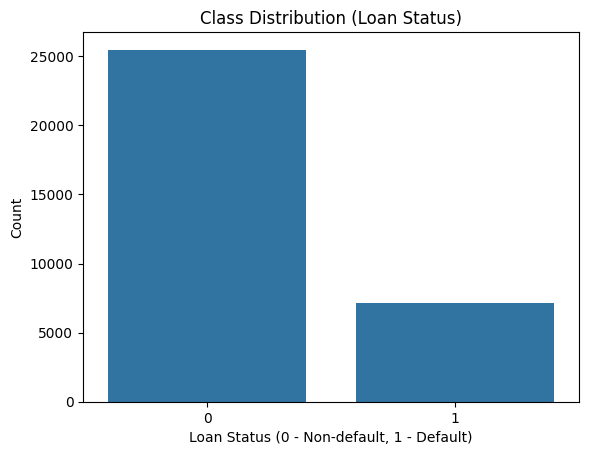

In [28]:
# Calculate the class distribution
# ToDo
class_distribution = df['loan_status'].value_counts()

# Create a bar plot
# ToDo
# Plot a bar chart for the class distribution
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution (Loan Status)')
plt.xlabel('Loan Status (0 - Non-default, 1 - Default)')
plt.ylabel('Count')
plt.show()

### Define target variable and features [1 Mark]

In [ ]:
# Define features(X) and target variable(y)
# ToDo

### Train-Test split [1 Mark]

In [ ]:
# Split the data into training and testing sets
# Use `stratify` parameter to maintain the class distribution across the training and testing set
# ToDo

### Check the class distribution in the training and test sets [1 Mark]

Ensure that both sets have same target class distribution as of the original dataset

In [ ]:
# Calculate the class distribution in the training set
# ToDo

In [ ]:
# Calculate the class distribution in the testing set
# ToDo

### Feature Scaling [1 Mark]

In [ ]:
# Initialize StandardScaler and transform the training and testing features
# ToDo

### Model Training [3 Mars]


In [ ]:
# Initialize the LogisticRegression model
# ToDo

# Fit the model with the SCALED training data
# ToDo

In [ ]:
# Initialize the DecisionTreeClassifier model
# ToDo

# Fit the model with the unscaled training data (Feature Scaling is not necessary for Tree based models)
# ToDo

In [ ]:
# Initialize the RandomForestClassifier model
# ToDo

# Fit the model with the unscaled training data (Feature Scaling is not necessary for Tree based models)
# ToDo

### Model Evaluation [2 Marks]


In [ ]:
# Make predictions on the test set with each of the models above
# ToDo

In [ ]:
# Evaluate each of the model performance

# Show accuracy, f1 score, precision, & recall for each of the trained models
# ToDo

### Inference [2 Marks]

In [ ]:
# Create a sample input dictionary with keys as feature names and values as feature values
# ToDo

# Convert the sample input dictionary into a dataframe to feed to the model
# ToDo

In [ ]:
# Define a simple fuction to make prediction for the sample input (use the best model among the above trained models)
# ToDo

In [ ]:
# Make prediction using the defined function using the sample input
# ToDo